# Data Extraction and Preprocessing

In [7]:
"""
Created on Fri March 29th 
    
    Data Extraction from .h5 file
    Resample
    Bandpass Filter
    Sync Data
    Standard Scale
    Rearrange Samples (Window Function)


@author: weil_tb
"""

# import functions and libs
%run 00_functions.ipynb

In [12]:
# Load Data
s1_imu_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s1_imu_raw.npz')
s1_adc_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s1_adc_raw.npz')
s2_imu_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s2_imu_raw.npz')
s2_adc_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s2_adc_raw.npz')
s3_imu_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s3_imu_raw.npz')
s3_adc_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s3_adc_raw.npz')
s4_imu_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s4_imu_raw.npz')
s4_adc_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s4_adc_raw.npz')
s5_imu_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s5_imu_raw.npz')
s5_adc_raw = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray\s5_adc_raw.npz')

## Data PipeLine
- Filter Bandpass
- Equalize length ADC/IMU
- Sync with correlation
- StandardScale: Mean/Std 

## Butter Bandpass Filter

In [13]:
# filter data and safe as new .npz

# Init Parameter (mx = longest journey in each session as valid IMU Samples)
lowcut = 6
highcut_adc = 18
highcut_imu = 18
fs = 100
mx1 =  28504
mx2 =  60894
mx3 =  16008
mx4 = 28304
mx5 = 15904
ordn = 4

# apply filter function
s1_adc_f, s1_imu_f = filt_sparse(s1_adc_raw,s1_imu_raw, lowcut, highcut_adc, highcut_imu, fs, mx1,ordn)
s2_adc_f, s2_imu_f = filt_sparse(s2_adc_raw,s2_imu_raw, lowcut, highcut_adc, highcut_imu, fs, mx2,ordn)
s3_adc_f, s3_imu_f = filt_sparse(s3_adc_raw,s3_imu_raw, lowcut, highcut_adc, highcut_imu, fs, mx3,ordn)
s4_adc_f, s4_imu_f = filt_sparse(s4_adc_raw,s4_imu_raw, lowcut, highcut_adc, highcut_imu, fs, mx4,ordn)
s5_adc_f, s5_imu_f = filt_sparse(s5_adc_raw,s5_imu_raw, lowcut, highcut_adc, highcut_imu, fs, mx5,ordn)

# save filtered data
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s1_imu_f',s1_imu_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s1_adc_f',s1_adc_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s2_imu_f',s2_imu_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s2_adc_f',s2_adc_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s3_imu_f',s3_imu_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s3_adc_f',s3_adc_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s4_imu_f',s4_imu_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s4_adc_f',s4_adc_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s5_imu_f',s5_imu_f)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s5_adc_f',s5_adc_f)

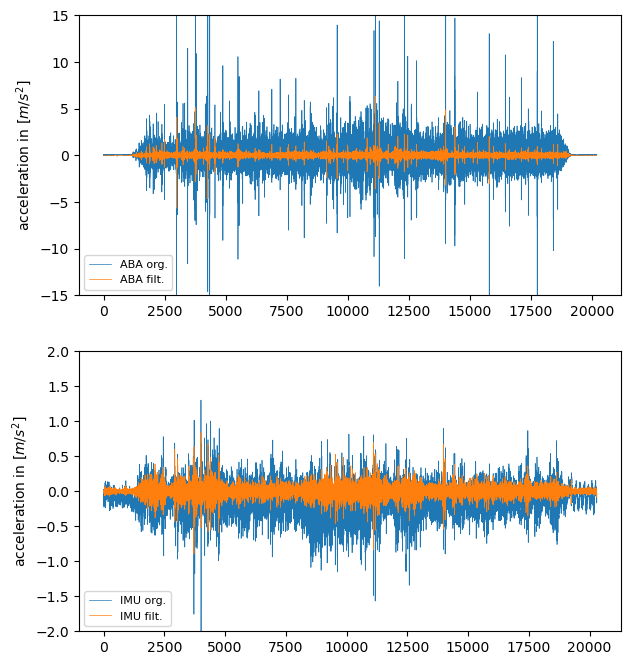

In [14]:
# Plot Data
fig, axes = plt.subplots(2, 1, figsize=(7,8))
ax = axes[0]
ax.plot(s2_adc_raw[12].data, label='ABA org.',linewidth=0.5)
ax.plot(s2_adc_f[12].data, label='ABA filt.',linewidth=0.5)
ax.set_ylim(bottom=-15, top = 15)
ax.set_ylabel('acceleration in [$m/s^2$]')
ax.legend(loc='lower left',fontsize=8)
ax = axes[1]
ax.plot(s2_imu_raw[12].data, label='IMU org.',linewidth=0.5)
ax.plot(s2_imu_f[12].data, label='IMU filt.',linewidth=0.5)
ax.set_ylim(bottom=-2, top = 2)
ax.set_ylabel('acceleration in [$m/s^2$]')
ax.legend(loc='lower left',fontsize=8)
fig.savefig(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\04_pictures/Filter_Result_trial.png', dpi=200)

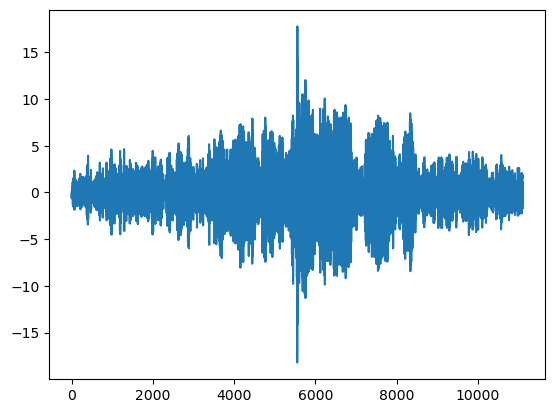

In [5]:
# plot correlation
plt.plot(np.correlate(s1_imu_f[2].data,s1_adc_f[2].data,mode='same'))#[3600:3800])

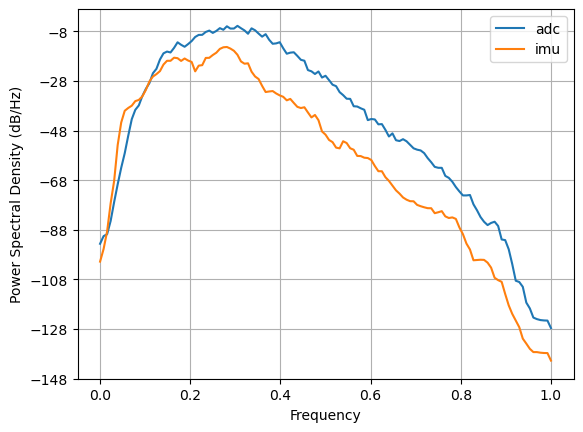

In [8]:
# plot PSD
plt.psd(s5_adc_f[2].data, label='adc')
plt.psd(s5_imu_f[2].data, label='imu')
plt.legend()

## Equalize Data length

In [9]:
# s3_jrn02: negative Delta!!
# implenent case by hand ..

print(s1_adc_f.shape)
print(s1_imu_f.shape)
print('Problem is:\n')
print(s1_adc_f.size)
print(s1_imu_f.size)

# apply equalize function
s1_adc_eq = eq_adc_imu_sparse(s1_adc_f,s1_imu_f, mx1)
s2_adc_eq = eq_adc_imu_sparse(s2_adc_f,s2_imu_f, mx2)
s3_adc_eq = eq_adc_imu_sparse(s3_adc_f,s3_imu_f, mx3)
s4_adc_eq = eq_adc_imu_sparse(s4_adc_f,s4_imu_f, mx4)
s5_adc_eq = eq_adc_imu_sparse(s5_adc_f,s5_imu_f, mx5)

# See if correct
print(s4_adc_eq[2].shape)
print(s4_imu_f[2].shape)
print('Problem solved:\n')
print(s4_adc_eq.size)
print(s4_imu_f.size)

# save equlized data
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s1_adc_eq',s1_adc_eq)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s2_adc_eq',s2_adc_eq)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s3_adc_eq',s3_adc_eq)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s4_adc_eq',s4_adc_eq)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s5_adc_eq',s5_adc_eq)

(15, 28504)
(15, 28504)
Problem is:

150473
151979
(1, 28304)
(1, 28304)
Problem solved:

370217
370217


## Snc Data

In [12]:
# apply sync function
s1_adc_sync,s1_d = sync_sparse(s1_adc_eq, s1_imu_f,mx1)
s2_adc_sync,s2_d = sync_sparse(s2_adc_eq, s2_imu_f,mx2)
s3_adc_sync,s3_d = sync_sparse(s3_adc_eq, s3_imu_f,mx3)
s4_adc_sync,s4_d = sync_sparse(s4_adc_eq, s4_imu_f,mx4)
s5_adc_sync,s5_d = sync_sparse(s5_adc_eq, s5_imu_f,mx5)

# After Sync Equalizing again
s1_adc_sync_ = eq_adc_imu_sparse(s1_adc_sync,s1_imu_f, mx1)
s2_adc_sync_ = eq_adc_imu_sparse(s2_adc_sync,s2_imu_f, mx2)
s3_adc_sync_ = eq_adc_imu_sparse(s3_adc_sync,s3_imu_f, mx3)
s4_adc_sync_ = eq_adc_imu_sparse(s4_adc_sync,s4_imu_f, mx4)
s5_adc_sync_ = eq_adc_imu_sparse(s5_adc_sync,s5_imu_f, mx5)

# pd.DataFrame(s1_d).to_csv("s1_d.csv")
# pd.DataFrame(s2_d).to_csv("s2_d.csv")
# pd.DataFrame(s3_d).to_csv("s3_d.csv")
# pd.DataFrame(s4_d).to_csv("s4_d.csv")
# pd.DataFrame(s5_d).to_csv("s5_d.csv")

# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s1_adc_sync',s1_adc_sync_)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s2_adc_sync',s2_adc_sync_)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s3_adc_sync',s3_adc_sync_)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s4_adc_sync',s4_adc_sync_)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s5_adc_sync',s5_adc_sync_)

In [13]:
print(s5_adc_sync_[19].data.std())
print(s5_imu_f[19].data.std())

0.28534860205964335
0.07039641702081681


## Extend Data Overview with metrics

In [75]:
# before Sync
DTW1,Pear1,CosSin1 = process_data(s1_adc_eq, s1_imu_f)
DTW2,Pear2,CosSin2 = process_data(s2_adc_eq, s2_imu_f)
DTW3,Pear3,CosSin3 = process_data(s3_adc_eq, s3_imu_f)
DTW4,Pear4,CosSin4 = process_data(s4_adc_eq, s4_imu_f)
DTW5,Pear5,CosSin5 = process_data(s5_adc_eq, s5_imu_f)
# after Sync
DTW1_,Pear1_,CosSin1_ = process_data(s1_adc_sync_, s1_imu_f)
DTW2_,Pear2_,CosSin2_ = process_data(s2_adc_sync_, s2_imu_f)
DTW3_,Pear3_,CosSin3_ = process_data(s3_adc_sync_, s3_imu_f)
DTW4_,Pear4_,CosSin4_ = process_data(s4_adc_sync_, s4_imu_f)
DTW5_,Pear5_,CosSin5_ = process_data(s5_adc_sync_, s5_imu_f)

In [15]:
# create list of sessions and journeys -> load data overview

ov = pd.read_csv(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\03_Tables/Data_Overview.csv')

# remove row with invalid journey
ov.drop(index=76, inplace=True)

#grab lists from df
session = ov['Session']
journey = ov['Journey']

In [16]:
# Create DF from Lists via dict
# concat lists
DTW = DTW1 + DTW2 + DTW3 + DTW4+DTW5 
DTW_ = DTW1_+DTW2_+DTW3_+DTW4_+DTW5_
Pear = Pear1 + Pear2 + Pear3 + Pear4 + Pear5 
Pear_ = Pear1_ + Pear2_ + Pear3_ + Pear4_ + Pear5_
CosSin = CosSin1 + CosSin2 +CosSin3 +CosSin4 +CosSin5
CosSin_ = CosSin1_ + CosSin2_ +CosSin3_ +CosSin4_ +CosSin5_
  
# dictionary of lists 
dict = {'Session': session, 'Journey': journey, 'DTW': DTW,'DTW_sync': DTW_, 'Pear': Pear,'Pear_sync': Pear_, 'CosSim': CosSin,   'CosSim_sync': CosSin_} 
    
sync_rev = pd.DataFrame(dict)
sync_rev.to_csv(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\03_Tables/sync_rev.csv')
sync_rev.head(20)

NameError: name 'DTW1' is not defined

In [42]:
len(DTW)

135

## Scale and Analyze Preprocessing Result

In [79]:
# scale sparse arrays
s1_adc, s1_imu = scale_sparse(s1_adc_sync_,s1_imu_f, mx1)
s2_adc, s2_imu = scale_sparse(s2_adc_sync_,s2_imu_f, mx2)
s3_adc, s3_imu = scale_sparse(s3_adc_sync_,s3_imu_f, mx3)
s4_adc, s4_imu = scale_sparse(s4_adc_sync_,s4_imu_f, mx4)
s5_adc, s5_imu = scale_sparse(s5_adc_sync_,s5_imu_f, mx5)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s1_adc_pp',s1_adc)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s2_adc_pp',s2_adc)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s3_adc_pp',s3_adc)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s4_adc_pp',s4_adc)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s5_adc_pp',s5_adc)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s1_imu_pp',s1_imu)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s2_imu_pp',s2_imu)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s3_imu_pp',s3_imu)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s4_imu_pp',s4_imu)
# save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s5_imu_pp',s5_imu)

Nr. of samples: 6997
Equal data size:  True
Cosine Similarity = 0.23711875910049174


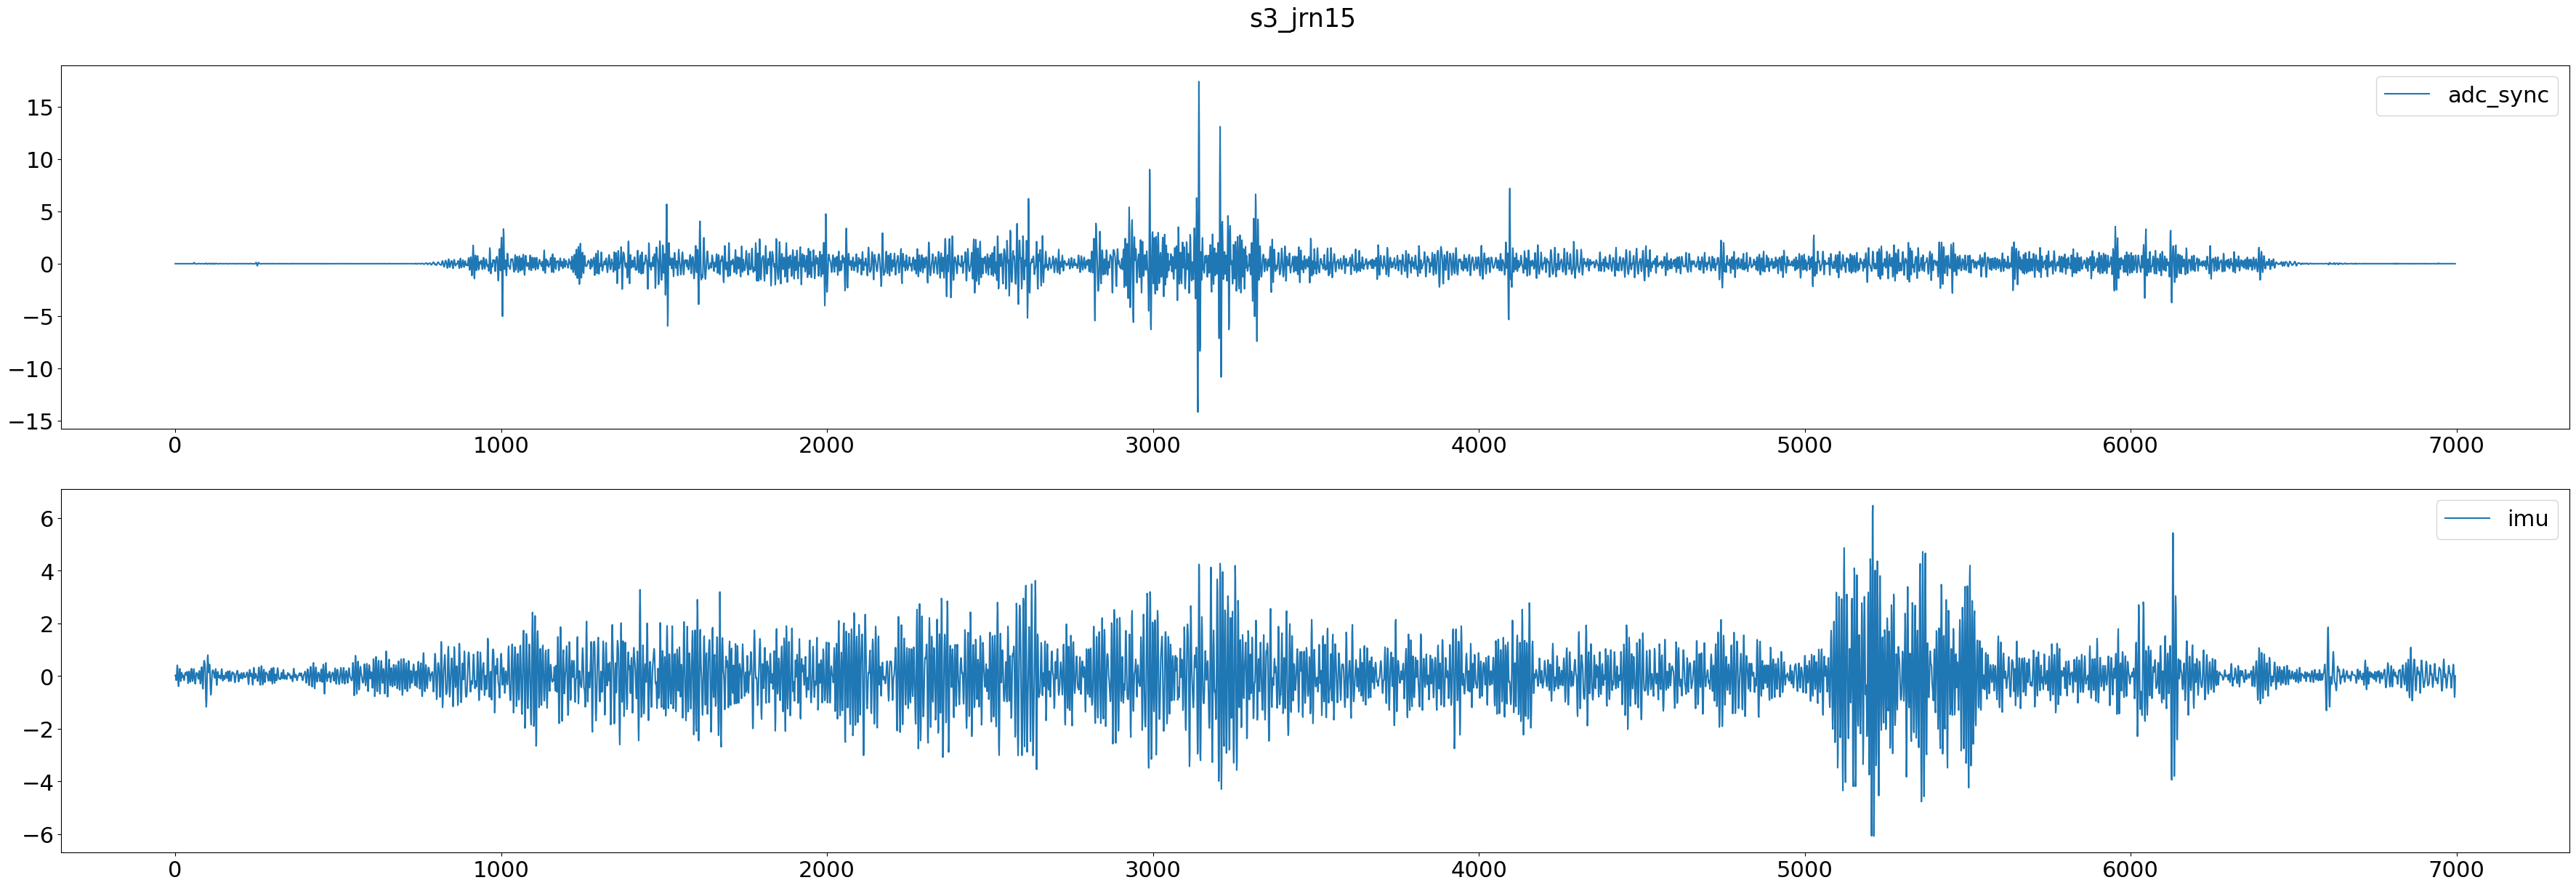

In [27]:
jrn=17
adc = s3_adc[jrn].data
imu = s3_imu[jrn].data
# compute cosine similarity
result = 1 - spatial.distance.cosine(adc, imu)
print('Nr. of samples:',adc.size)
# double check if data has same dimension
print('Equal data size: ', adc.size == imu.size)
print('Cosine Similarity =', result)
fig, axes = plt.subplots(2, 1, figsize=(36,12))
fig.tight_layout()
fig.suptitle('s3_jrn15', y=1.03, fontsize=25)
plt.rcParams.update({'font.size': 22})
ax = axes[0]
ax.plot(adc, label='adc_sync')
ax.legend()
ax = axes[1]
ax.plot(imu, label='imu')
ax.legend()
fig.savefig(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\04_pictures/C_rating_journey.png', dpi=fig.dpi)

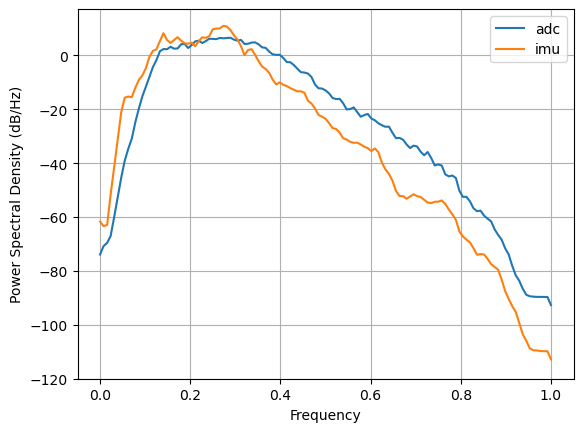

In [5]:
plt.psd(adc, label='adc')
plt.psd(imu, label='imu')
plt.legend()

In [137]:
s1_adc[5].data.std()

0.9999999999999999

In [138]:
s1_adc[5].data.mean()

-8.126743682922028e-18

## Split Data into Test, Train, Val
- s1: 15x28504
- s2: 18x60894 
- s3: 43x16008 
- s4: 39x28304 
- s5: 20x15904 

->
- X_train, X_val = 0.85, 0.15 * (s1, s3, s4,s5) mx_train = 28504
- X_train = 117 * 0.8 = 100 Samples, X_val = 17 Samples
- X_test = s2 -> so less padding in test data! -> mx_test = 60894 

In [3]:
# load preprocessed data
s1_imu = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s1_imu_pp.npz')
s1_adc = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s1_adc_pp.npz')
s2_imu = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s2_imu_pp.npz')
s2_adc = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s2_adc_pp.npz')
s3_imu = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s3_imu_pp.npz')
s3_adc = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s3_adc_pp.npz')
s4_imu = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s4_imu_pp.npz')
s4_adc = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s4_adc_pp.npz')
s5_imu = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s5_imu_pp.npz')
s5_adc = load_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/s5_adc_pp.npz')

In [140]:
len(s1_adc[0].data)

7101

In [141]:
mx_train = 28504

# Combine sessions to X and y for Splitting

X = pad_zero(s1_adc[0].data, mx_train)
y = pad_zero(s1_imu[0].data, mx_train)

for jrn in range(s1_adc.shape[0]-1):
    X = np.vstack((X, pad_zero(s1_adc[jrn+1].data, mx_train)))
    y = np.vstack((y, pad_zero(s1_imu[jrn+1].data, mx_train)))

for jrn in range(s3_adc.shape[0]):
    X = np.vstack((X, pad_zero(s3_adc[jrn].data, mx_train)))
    y = np.vstack((y, pad_zero(s3_imu[jrn].data, mx_train)))

# skipping jrn 13 and 14 --> big sync delta
for jrn in range(s4_adc.shape[0]):
    if jrn != 13:
        if jrn != 14:
            X = np.vstack((X, pad_zero(s4_adc[jrn].data, mx_train)))
            y = np.vstack((y, pad_zero(s4_imu[jrn].data, mx_train)))

for jrn in range(s5_adc.shape[0]):
    X = np.vstack((X, pad_zero(s5_adc[jrn].data, mx_train)))
    y = np.vstack((y, pad_zero(s5_imu[jrn].data, mx_train)))

X = csr_matrix(X)
y = csr_matrix(y)

In [149]:
# apply function for data splitting 
X_train,X_val, y_train, y_val= train_test_split(X , y, test_size=(1-100/115), random_state=69)
X_test = s5_adc
y_test = s5_imu

# check dimensions
print(f'type X_test: {type(X_test)} \ntype X_train: {type(X_train)}\ntype X_val: {type(X_val)}')
print(f'type y_test: {type(y_test)} \ntype y_train: {type(y_train)}\ntype y_val: {type(y_val)}')
print(f'dim X_test: {X_test.shape} \ndim X_train: {X_train.shape}\ndim X_val: {X_val.shape}')
print(f'dim y_test: {y_test.shape} \ndim y_train: {y_train.shape}\ndim y_valn: {y_val.shape}')

type X_test: <class 'scipy.sparse._csr.csr_matrix'> 
type X_train: <class 'scipy.sparse._csr.csr_matrix'>
type X_val: <class 'scipy.sparse._csr.csr_matrix'>
type y_test: <class 'scipy.sparse._csr.csr_matrix'> 
type y_train: <class 'scipy.sparse._csr.csr_matrix'>
type y_val: <class 'scipy.sparse._csr.csr_matrix'>
dim X_test: (20, 15904) 
dim X_train: (99, 28504)
dim X_val: (16, 28504)
dim y_test: (20, 15904) 
dim y_train: (99, 28504)
dim y_valn: (16, 28504)


In [150]:
# save data
save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/X_train',X_train)
save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/y_train',y_train)
save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/X_test',X_test)
save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/y_test',y_test)
save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/X_val',X_val)
save_npz(r'\\bstsfs02.intra.dlr.de\AIMunsicher02\Trackscan\Studenten_2023_04\Masterarbeit_Weiland\Data\SparseArray/y_val',y_val)